In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [55]:
data = pd.read_excel ("HW_Data_Set.xlsx")
df = data.copy()

In [56]:
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(3)
memory usage: 6.4+ MB


In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ind_5,6167.0,-0.803146,23.624403,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_6,6167.0,-0.803470,23.624144,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_8,6167.0,48.388890,36.388526,0.000000,14.285714,50.000000,85.714286,100.000000
ind_9,6167.0,48.289282,36.478009,0.000000,14.285714,50.000000,85.714286,100.000000
ind_10,6167.0,0.099609,60.414625,-100.000000,-50.000000,0.000000,57.142857,100.000000
...,...,...,...,...,...,...,...,...
ind_426,6167.0,0.498188,0.228547,0.000000,0.323783,0.495192,0.675730,1.000000
ind_428,6167.0,0.490174,0.150483,0.083530,0.379894,0.487078,0.601508,0.868534
20_target,6167.0,-0.057102,14.834497,-15.780588,-15.350354,0.000000,15.385945,15.768767
50_target,6167.0,-2.906358,34.559778,-37.142889,-36.208094,-34.267756,35.879524,37.038694


In [59]:
df.shape

(6167, 136)

In [60]:
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [61]:
df.isnull().values.any()

False

In [62]:
num_deg = []
kat_deg = []

for col in df:
    if(df.dtypes[col] == "object"):
        kat_deg.append(col)
    else:
        num_deg.append(col)

kat_deg

['ind_109', 'ind_420', 'ind_422']

In [63]:
for i in kat_deg:
    print(i,": ",df[i].value_counts().count())

# Kategorik verilerde kaç farklı kategori olduğuna baktım;

ind_109 :  2
ind_420 :  582
ind_422 :  573


# Dummy

In [64]:
dms = pd.get_dummies(df[['ind_109']])
dms.head()

,ind_109_GREEN,ind_109_RED
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [65]:
df = df.drop(["ind_109", "50_target", "90_target"], axis = 1)

In [66]:
df = pd.concat([df, dms[["ind_109_GREEN"]]], axis = 1)

In [67]:
df["ind_420"] = df["ind_420"].replace("?", np.nan)
df["ind_422"] = df["ind_422"].replace("?", np.nan)

In [68]:
df = df.dropna(axis=0, subset=["ind_420","ind_422"])

In [69]:
df.isnull().sum().sum()

0

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5126 entries, 0 to 6166
Columns: 134 entries, ind_5 to ind_109_GREEN
dtypes: float64(88), int64(45), uint8(1)
memory usage: 5.2 MB


In [71]:
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,ind_109_GREEN
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,2.0,-49.6,-54,-152.0,-353.0,1.0,0.498547,0.701906,15.135802,1
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.8,-55.6,-60,-158.0,-359.0,1.0,0.537088,0.690833,15.143348,1
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,2.7,-58.4,-60,-160.0,-362.0,1.0,0.615169,0.693040,15.146870,1
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.9,-61.8,-65,-166.0,-367.0,1.0,0.661517,0.673418,15.153283,1
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.1,-79.8,-86,-186.0,-388.0,1.0,0.747204,0.700522,-15.179065,1


In [72]:
y = df["20_target"]

In [73]:
X = df.drop(["20_target"], axis=1)

In [74]:
X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,ind_109_GREEN
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,0.002371,2.0,-49.6,-54,-152.0,-353.0,1.0,0.498547,0.701906,1
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.003074,0.8,-55.6,-60,-158.0,-359.0,1.0,0.537088,0.690833,1
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,0.003561,2.7,-58.4,-60,-160.0,-362.0,1.0,0.615169,0.693040,1
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.004366,0.9,-61.8,-65,-166.0,-367.0,1.0,0.661517,0.673418,1
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.004198,0.1,-79.8,-86,-186.0,-388.0,1.0,0.747204,0.700522,1


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)
X_train.shape, X_test.shape

((3844, 133), (1282, 133))

In [76]:
X_train = pd.DataFrame(X_train["ind_5"])
X_test = pd.DataFrame(X_test["ind_5"])
X_train.shape, X_test.shape


#20_target değişkenini modellemek, eksenlerdeki duurmunu görmek için ind_5 değişkeni seçiyorum

((3844, 1), (1282, 1))

In [83]:
cart_model = DecisionTreeRegressor()

In [84]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

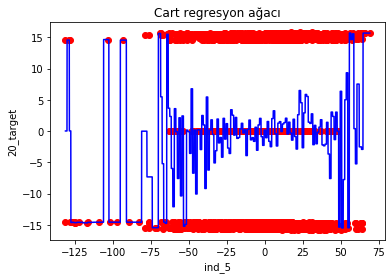

In [85]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X_train,y_train,color="red")
plt.plot(X_grid,cart_model.predict(X_grid),color ="blue")
plt.title("Cart regresyon ağacı")
plt.xlabel("ind_5")
plt.ylabel("20_target")
plt.show()

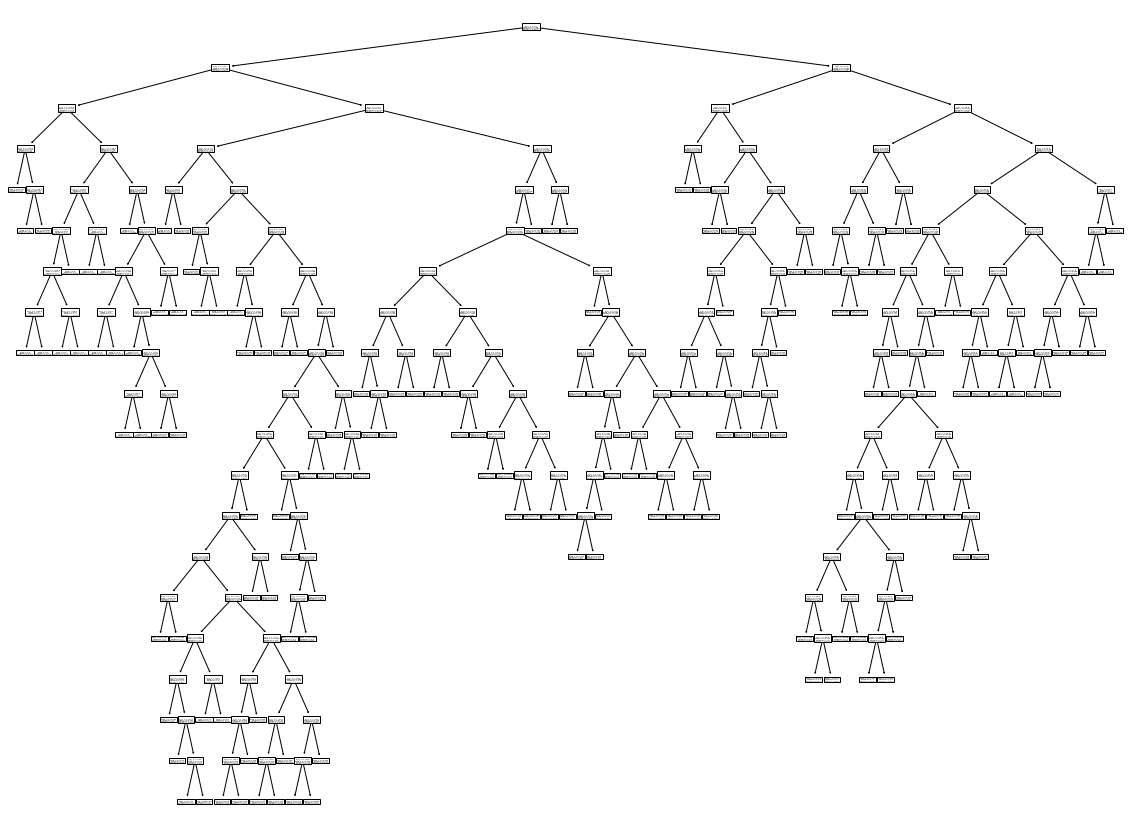

In [88]:
plt.figure(figsize=(20,15))
tree.plot_tree(cart_model);

In [89]:
from skompiler import skompile

In [90]:
print(skompile(cart_model.predict).to('python/code'))

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.decomposition.pca module is  deprecated in version 0.22 and wi

((((0.026976119999999604 if x[0] <= -130.0 else 14.54974788 if x[0] <= 
    -128.5 else 0.03716290000000022) if x[0] <= -127.5 else ((((
    -14.59087231 if x[0] <= -126.5 else -14.553395) if x[0] <= -125.5 else 
    -14.620552326666669 if x[0] <= -123.5 else -14.56232416) if x[0] <= 
    -119.5 else -14.65237031) if x[0] <= -116.5 else -14.56660009 if x[0] <=
    -112.5 else -14.54861601) if x[0] <= -106.0 else 14.62948148 if x[0] <=
    -102.5 else ((-14.54169906 if x[0] <= -99.5 else -14.54559771) if x[0] <=
    -95.0 else 14.53591397 if x[0] <= -91.0 else (-14.54232787 if x[0] <= 
    -86.0 else -14.54836449) if x[0] <= -81.0 else -0.0076086499999998836 if
    x[0] <= -77.5 else -7.30927006) if x[0] <= -74.0 else -15.42681753 if x
    [0] <= -71.5 else -15.42945855) if x[0] <= -70.0 else ((15.60037017 if 
    x[0] <= -68.5 else 5.482880046666668) if x[0] <= -67.5 else (
    -5.200919890000001 if x[0] <= -66.5 else -14.5371716 if x[0] <= -65.5 else
    -14.72374069) if x[0] <= -64.5

In [91]:
cart_model.predict(X_test)[0:5]

array([ -2.70089632,  -9.16012577,   2.49882266,   3.24866991,
       -15.46772187])

In [92]:
y_pred =cart_model.predict(X_test)

In [93]:
np.sqrt(mean_squared_error(y_test, y_pred))

15.122974790804916

## Model Tuning

In [106]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 15, min_samples_split= 10)
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [107]:
np.sqrt(mean_squared_error(y_test, y_pred))

14.887640829882942

In [123]:
cart_params = {"min_samples_split": range(200),
               "max_leaf_nodes": range(20)}

In [124]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [125]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [126]:
cart_cv_model.fit(X_train, y_train)

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a floa

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 0 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selecti

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a floa

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a floa

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a floa

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a floa

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a floa

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a floa

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a floa

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a floa

C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 0

  FitFailedWarning)
C:\Users\Seyma Civan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a floa

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=15,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=10,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': range(0, 20),
                         'min_samples_split': range(0, 200)},
             pre_dispatch='2*n_jobs'

In [128]:
cart_cv_model.best_params_

{'max_leaf_nodes': 3, 'min_samples_split': 2}

In [129]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 3, min_samples_split = 2)

In [130]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=3,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [131]:
y_pred = cart_tuned.predict(X_test)

In [132]:
np.sqrt(mean_squared_error(y_test, y_pred))

14.860268759106734